In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from generateData import generateData
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from random import randrange
from kmeans import kmeans

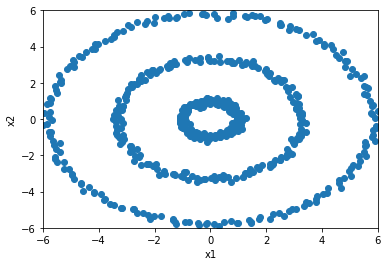

In [2]:
# Generate data
data = generateData()

# Plot data
plt.figure(1)
plt.scatter(data[:,0], data[:,1])  
plt.xlabel('x1')  
plt.ylabel('x2')  
plt.ylim(-6, 6)  
plt.xlim(-6, 6) 
plt.show()

In [3]:
def simpleInitialization(X,k):
    # Initialize k centroids randomly
    centroidIndices = []
    for i in range(k):
        r = randrange(X.shape[0])
        while r in centroidIndices:
            r = randrange(X.shape[0])
        centroidIndices.append(r)
        
    centroids = np.zeros((k,X.shape[1]))
    for i in range(k):
        centroids[i,:] = X[centroidIndices[i],:]
        
    return centroids


We found the solution in 11 iterations!


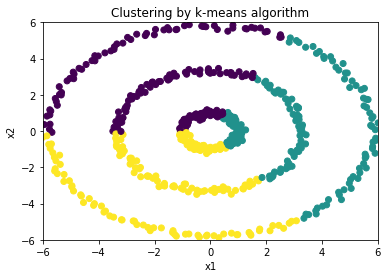

In [4]:
# Number of clusters
k = 3

# Cluster using kmeans
labels = kmeans(data, k)

# Plot clustering produced by kmeans
plt.figure(2)
plt.scatter(data[:,0], data[:,1], c=labels, facecolors="none") 
plt.xlabel('x1')  
plt.ylabel('x2') 
plt.title('Clustering by k-means algorithm')
plt.ylim(-6, 6)  
plt.xlim(-6, 6) 
plt.show()

In [5]:
def findClosestNeighbours(data, N):
    
    closestNeighbours = np.zeros((data.shape[0], N))
    distances = np.zeros(data.shape[0])

    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j:
                distances[j] = np.linalg.norm(data[i,:] - data[j,:])    
            else:
                distances[j] = 0
                
        closestNeighbours[i,:] = np.argsort(distances)[:N]
    
    return closestNeighbours

In [8]:
def spectralClustering(W, k):

    # ====================== ADD YOUR CODE HERE ======================
    # Instructions: Perform spectral clustering to partition the 
    #               data into k clusters. Implement the steps that
    #               are described in Algorithm 2 on the assignment.    
    
    
    
    
    # =============================================================
    # Create degree matrix
    D = np.diag(np.sum(W, axis =0))
    
    #Create Laplacian Matrix
    L = D- W
    
    eigval, eigvec = np.linalg.eig(L)
    eigval = eigval.real
    eigvec = eigvec.real
    idx = eigval.argsort()
    sorted_eigvec = eigvec[:,idx]
    Y = sorted_eigvec[:,:k]
    labels = kmeans(Y,k)
    
    
    return labels

We found the solution in 1 iterations!


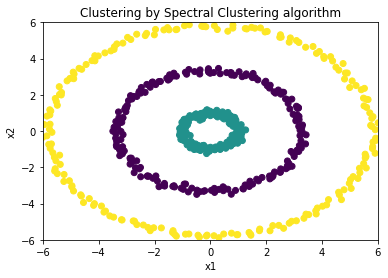

In [9]:
# Find N closest neighbours of each data point
N = 10
closestNeighbours = findClosestNeighbours(data, N)

# Create adjacency matrix
W = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(N):
        W[i,int(closestNeighbours[i,j])] = 1
        W[int(closestNeighbours[i,j]),i] = 1
        

# Perform spectral clustering
labels = spectralClustering(W, k)  

# Plot clustering produced by spectral clustering
plt.figure(3)
plt.scatter(data[:,0], data[:,1], c=labels, facecolors="none") 
plt.xlabel('x1')  
plt.ylabel('x2')
plt.title('Clustering by Spectral Clustering algorithm')
plt.ylim(-6, 6)  
plt.xlim(-6, 6) 
plt.show()

 